# Importing libraries and Inspection

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans  

In [2]:
# Importing the dataset
df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
# Checking the head of the dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleansing

In [5]:
# Checking for null values
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [6]:
# Filling the null value with the average value
df.fillna(df.mean(), inplace=True)

In [7]:
# Checking for null values
df.isnull().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

## Feature Engineering

### Subtract the year 2014 with the year_birth column to get the age of the customer

In [8]:
df['Age'] = df['Year_Birth'].apply(lambda x: 2014-x)

### Grouping the age

In [9]:
def group_age(data):
    if data > 9 and data <= 24:
        return 'Gen Z / Zoomers (10-24)'
    elif data > 24 and data <= 40:
        return 'Gen Y / Millenials (25-40)'
    elif data > 40 and data <= 56:
        return 'Gen X (40-56)'
    elif data > 56:
        return 'Baby Boomers (57 and above)'
    return 'Unspecified'

df['Generation'] = df['Age'].apply(group_age)

### Sum up all the products bought

In [10]:
df['Amount_Total'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### Sum up all the purchases made

In [11]:
df['Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

### Sum up all the children the customer have

In [12]:
df['Children'] = df['Kidhome'] + df['Teenhome']

### Transforming Education

In [13]:
# Checking unique variables
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [14]:
# Transformed the education level to either 'Undergraduate' or 'Postgraduate'
df['Education'] = df['Education'].apply(lambda x: 'Undergraduate' if x == 'Basic' else 'Postgraduate')

### Transforming Marital Status

In [15]:
# Checking unique variables
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [16]:
# Transformed the marital status to either 'In Relationship' or 'Single'
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'In Relationship' if x == 'Married' or x == 'Together' else 'Single')

### Sum up all the family members the customers have

In [17]:
df['Family_Size'] =  df.apply(lambda x: x['Children'] + 2 if x['Marital_Status'] == 'In Relationship' else x['Children'] + 1, axis=1)

### Sum up all the marketing campaigns the customer accept

In [18]:
df['Total_AcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

### Transforming Dt_Customer 

In [19]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
print(df['Dt_Customer'].min())
print(df['Dt_Customer'].max())

2012-01-08 00:00:00
2014-12-06 00:00:00


In [20]:
# It looks like the latest customer enrollment in the company was December 6, 2014 so let's assume the last time the data was
# updated was December 7, 2014
df['Date_Collected'] = pd.to_datetime('2014-12-07')

In [21]:
# Subtract the date collected and the date of customer's enrollment with the company
df['Customer_Enrolled'] = (df['Date_Collected'] - df['Dt_Customer']).dt.days

In [22]:
# Subtract Customer_Enrolled with recency to get how many days the customer was active
df['Days_Active'] = df['Customer_Enrolled'] - df['Recency']

### Drop useless columns

In [23]:
df.drop(columns=['ID', 'Year_Birth','Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Date_Collected', 'Customer_Enrolled'], axis=1, inplace=True)

In [24]:
# Checking the head of the data after feature engineering
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Complain,Response,Age,Generation,Amount_Total,Total_Purchases,Children,Family_Size,Total_AcceptedCmp,Days_Active
0,Postgraduate,Single,58138.0,58,635,88,546,172,88,88,...,0,1,57,Baby Boomers (57 and above),1445,25,0,1,1,914
1,Postgraduate,Single,46344.0,38,11,1,6,2,1,6,...,0,0,60,Baby Boomers (57 and above),25,6,2,3,0,88
2,Postgraduate,In Relationship,71613.0,26,426,49,127,111,21,42,...,0,0,49,Gen X (40-56),665,21,0,2,0,447
3,Postgraduate,In Relationship,26646.0,26,11,4,20,10,3,5,...,0,0,30,Gen Y / Millenials (25-40),43,8,1,3,0,40
4,Postgraduate,In Relationship,58293.0,94,173,43,118,46,27,15,...,0,0,33,Gen Y / Millenials (25-40),376,19,1,3,0,228


## Removing Outliers

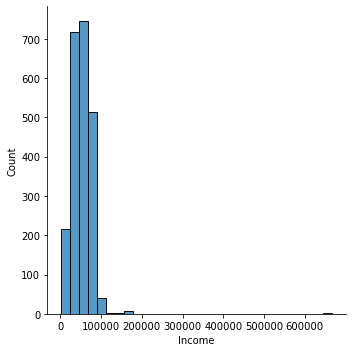

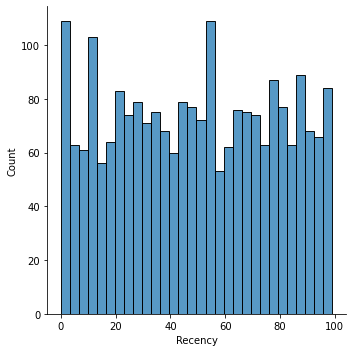

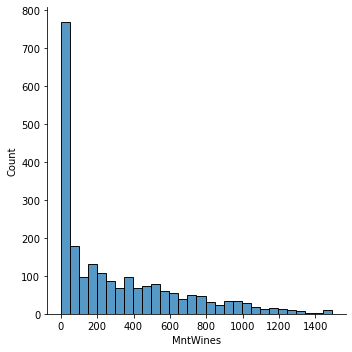

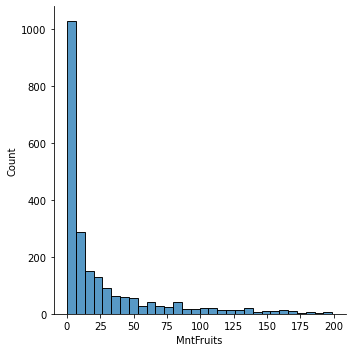

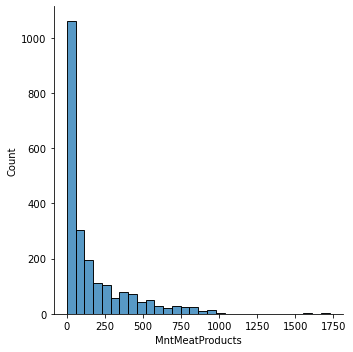

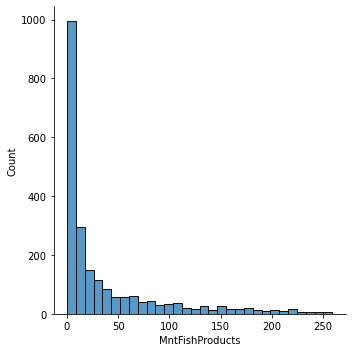

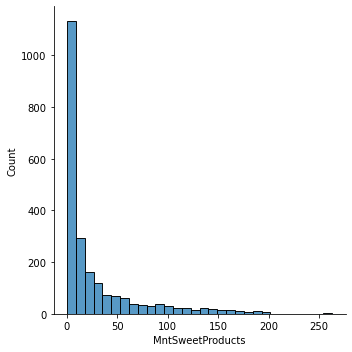

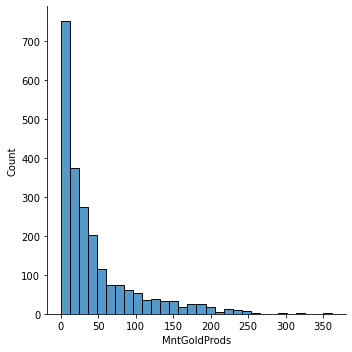

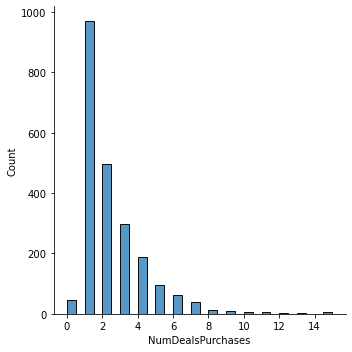

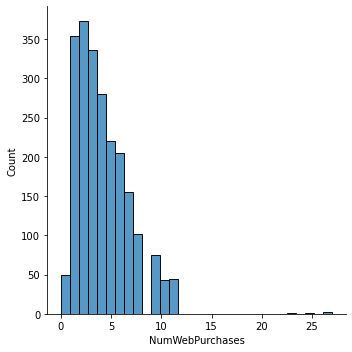

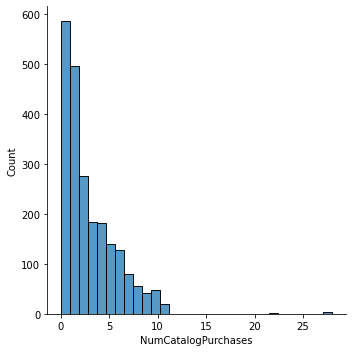

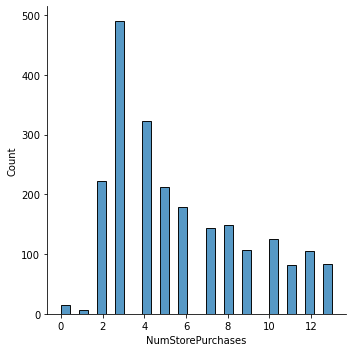

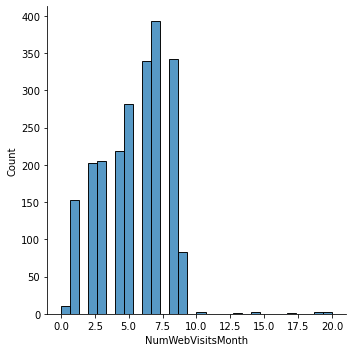

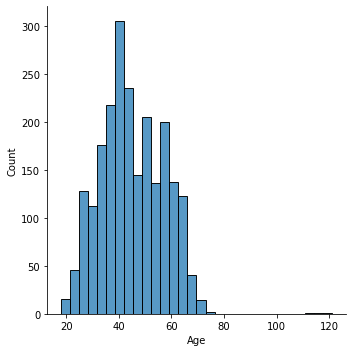

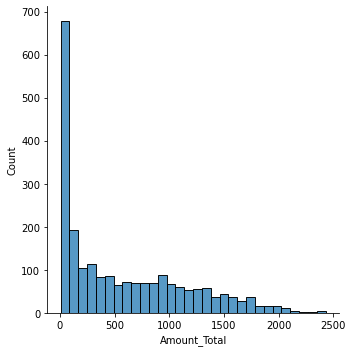

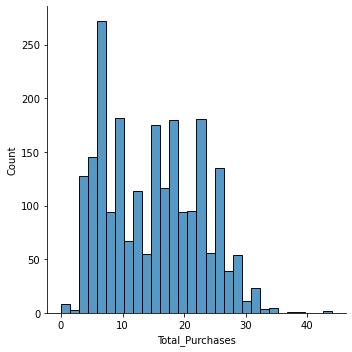

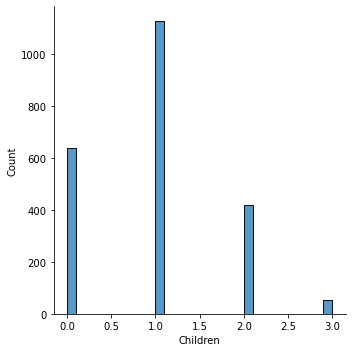

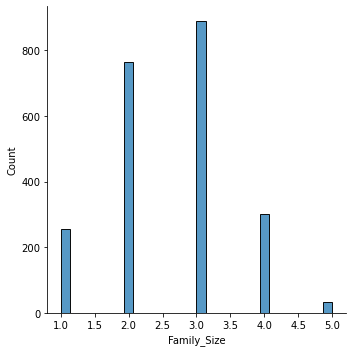

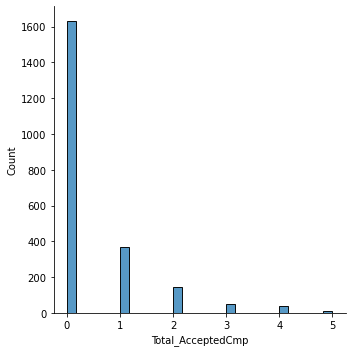

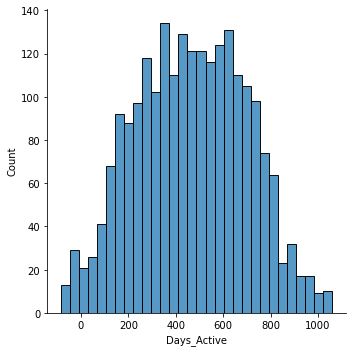

In [25]:
# Checking for outliers
df_dist = df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
       'Age', 'Amount_Total', 'Total_Purchases', 'Children', 'Family_Size', 'Total_AcceptedCmp', 'Days_Active']]

for i in df_dist.columns:
    sns.displot(x=i, bins=30, data=df)

### It looks like the columns that have outliers are Income, MntMeatProducts, NumWebPurchases, NumCatalogPurchases, Total_Purchases, and Age

In [26]:
df['Income'] = df['Income'].apply(lambda x: x if x < 120000 else np.nan)

In [27]:
df['MntMeatProducts'] = df['MntMeatProducts'].apply(lambda x: x if x < 1100 else np.nan)

In [28]:
df['NumWebPurchases'] = df['NumWebPurchases'].apply(lambda x: x if x < 15 else np.nan) 

In [29]:
df['NumCatalogPurchases'] = df['NumCatalogPurchases'].apply(lambda x: x if x < 15 else np.nan)

In [30]:
df['Total_Purchases'] = df['Total_Purchases'].apply(lambda x: x if x < 40 else np.nan) 

In [31]:
df['Age'] = df['Age'].apply(lambda x: x if x < 80 else np.nan) 

In [32]:
# Checking for null values
df.isnull().any()

Education              False
Marital_Status         False
Income                  True
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts         True
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases         True
NumCatalogPurchases     True
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                     True
Generation             False
Amount_Total           False
Total_Purchases         True
Children               False
Family_Size            False
Total_AcceptedCmp      False
Days_Active            False
dtype: bool

In [33]:
# Checking the shape
df.shape

(2240, 30)

In [34]:
# Drop null values
df.dropna(inplace=True)

In [35]:
# Checking for null values
df.isnull().any()

Education              False
Marital_Status         False
Income                 False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                    False
Generation             False
Amount_Total           False
Total_Purchases        False
Children               False
Family_Size            False
Total_AcceptedCmp      False
Days_Active            False
dtype: bool

In [36]:
# Checking the shape
df.shape

(2223, 30)

# Data Visualization

## Education

Text(0.5, 1.0, 'Education level')

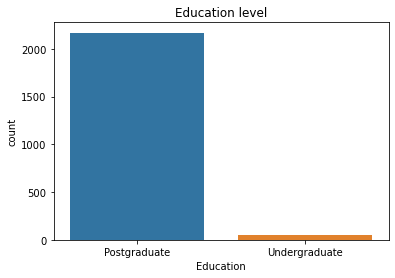

In [37]:
sns.countplot(x='Education', data=df)
plt.title('Education level')

## Marital Status

Text(0.5, 1.0, 'Marital Status')

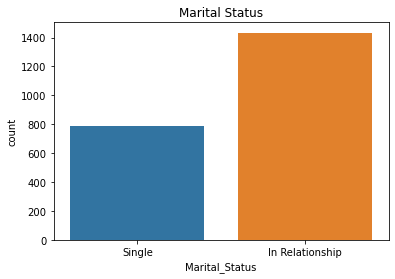

In [38]:
sns.countplot(x='Marital_Status', data=df)
plt.title('Marital Status')

## Place

Text(0.5, 1.0, 'Total purchases of each place')

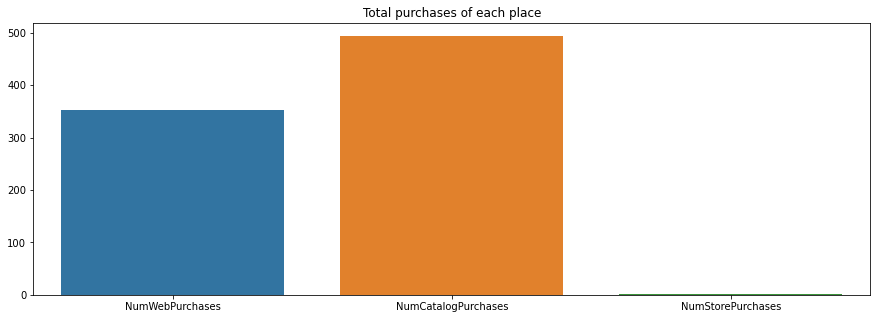

In [39]:
each_place = ['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
total_place = []
[total_place.append(len(df[df[place] == 1])) for place in each_place]

plt.figure(figsize=(15,5))
sns.barplot(x=each_place, y=total_place)
plt.title('Total purchases of each place')

## Products

Text(0.5, 1.0, 'Total amount of each products')

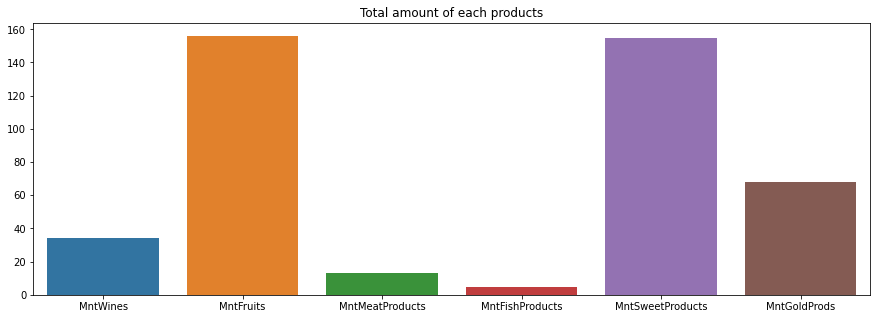

In [40]:
each_prods = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
total_prods = []
[total_prods.append(len(df[df[prod] == 1])) for prod in each_prods]

plt.figure(figsize=(15,5))
sns.barplot(x=each_prods, y=total_prods)
plt.title('Total amount of each products')

## Marketing Campaign

Text(0.5, 1.0, 'Total of Accepted Campaign offers on each Campaign')

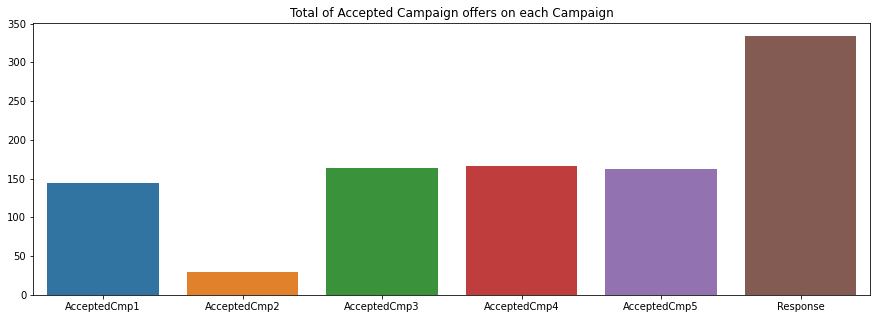

In [41]:
each_cmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
total_cmp = []
[total_cmp.append(len(df[df[cmp] == 1])) for cmp in each_cmp]

plt.figure(figsize=(15,5))
sns.barplot(x=each_cmp, y=total_cmp)
plt.title('Total of Accepted Campaign offers on each Campaign')

## Complains

Text(0.5, 1.0, 'Total Complains')

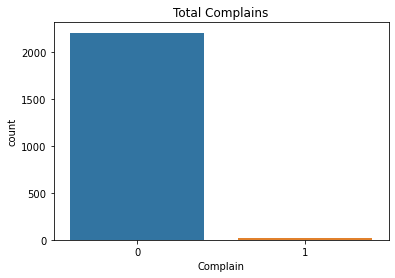

In [42]:
sns.countplot(x='Complain', data=df)
plt.title('Total Complains')

## Generation

Text(0.5, 1.0, 'Generation')

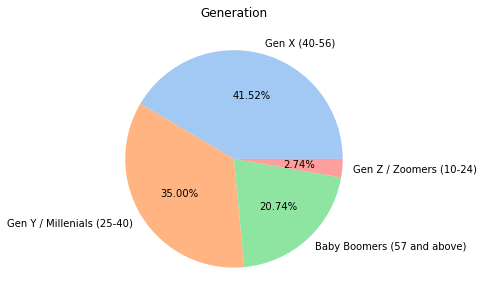

In [43]:
colors = sns.color_palette('pastel')[0:5]
Generation = df['Generation'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(Generation, labels = Generation.index, colors = colors, autopct='%1.2f%%')
plt.title('Generation')

## Data Distribution

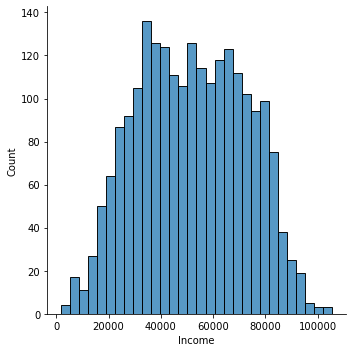

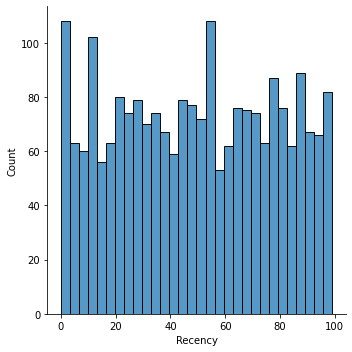

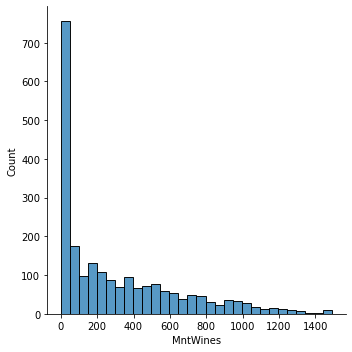

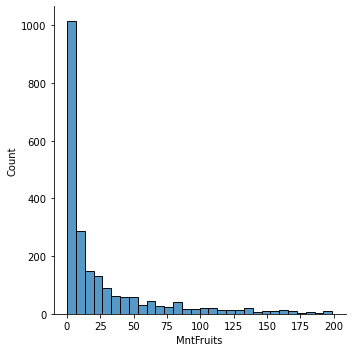

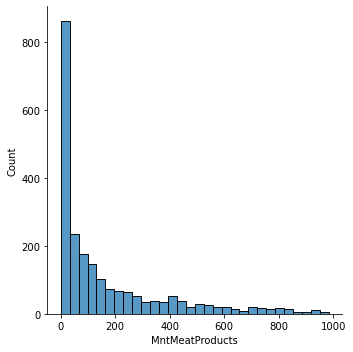

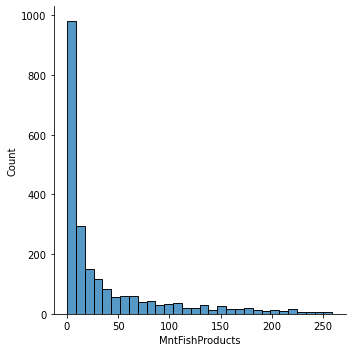

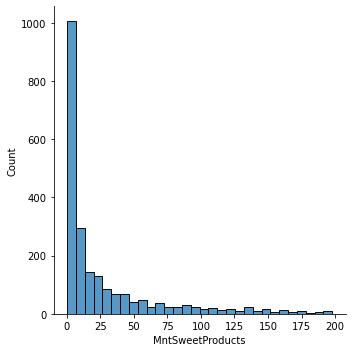

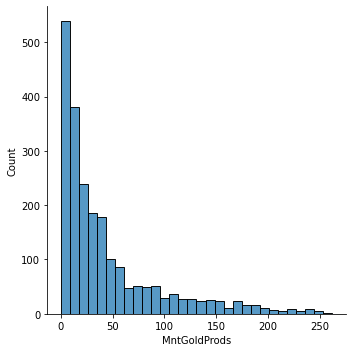

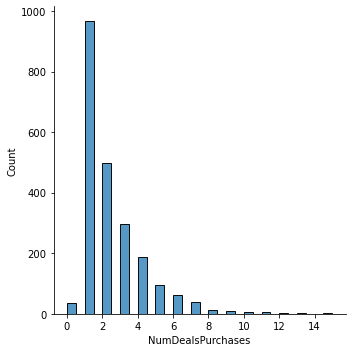

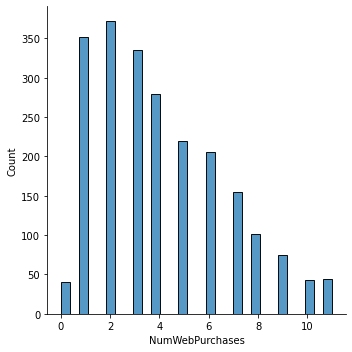

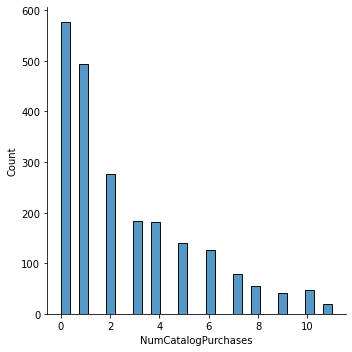

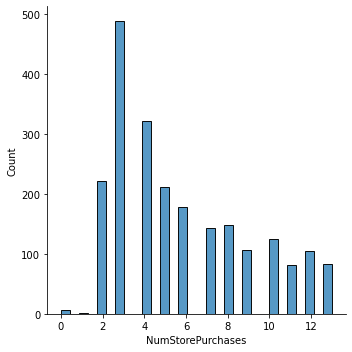

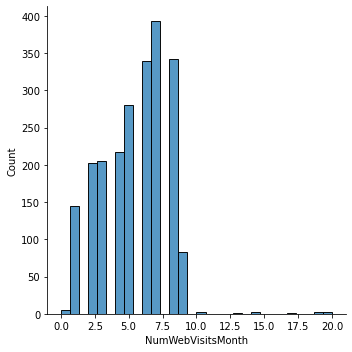

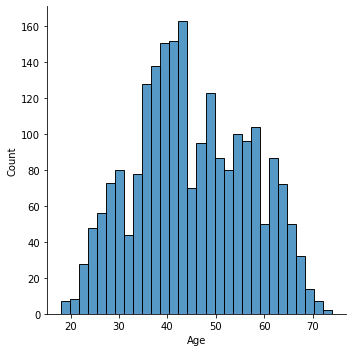

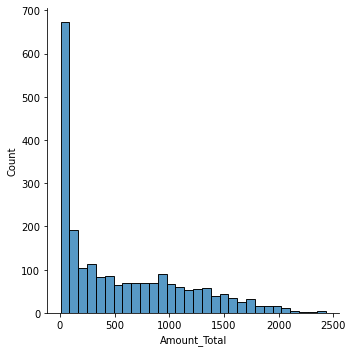

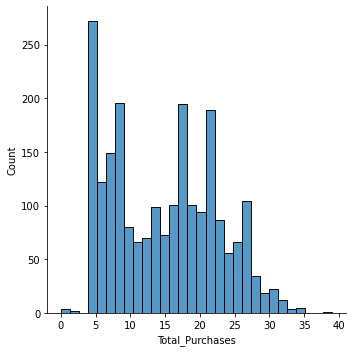

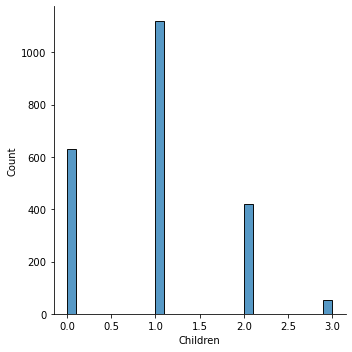

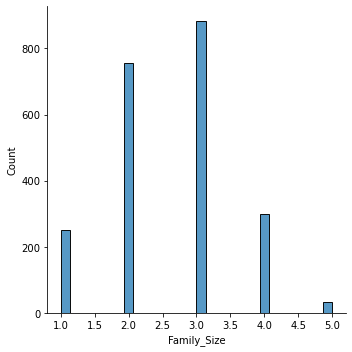

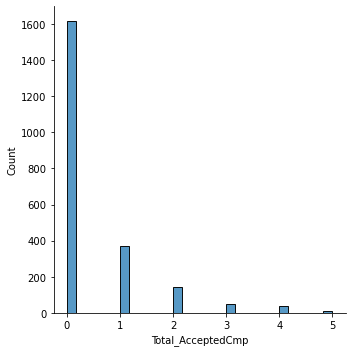

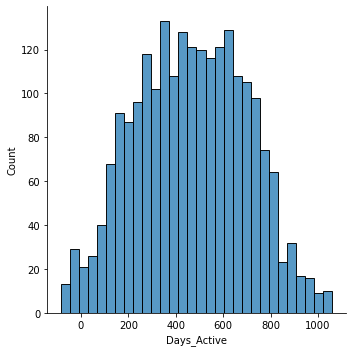

In [44]:
df_dist = df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
       'Age', 'Amount_Total', 'Total_Purchases', 'Children', 'Family_Size', 'Total_AcceptedCmp', 'Days_Active']]

for i in df_dist.columns:
    sns.displot(x=i, bins=30, data=df)

## Income based on Education

Text(0.5, 1.0, 'Income based on Education')

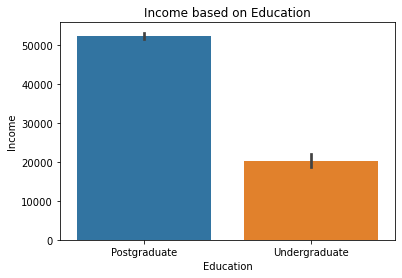

In [45]:
sns.barplot(x='Education', y='Income', data=df)
plt.title('Income based on Education')

## Income based on Marital Status

Text(0.5, 1.0, 'Income based on Marital Status')

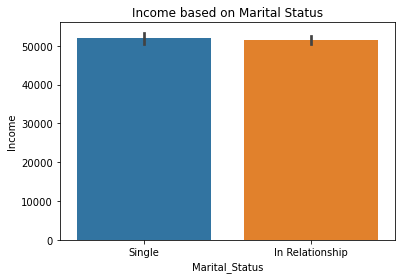

In [46]:
sns.barplot(x='Marital_Status', y='Income', data=df)
plt.title('Income based on Marital Status')

## Income based on how many Children

Text(0.5, 1.0, 'Income based on how many Children')

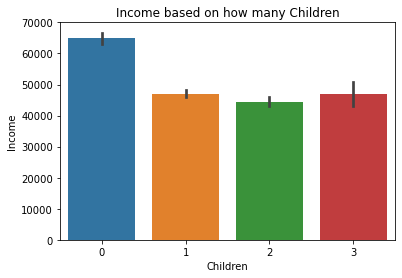

In [47]:
sns.barplot(x='Children', y='Income', data=df)
plt.title('Income based on how many Children')

## Correlation between Total Purchases and Income

Text(0.5, 1.0, 'Correlation between Total Purchases and Income')

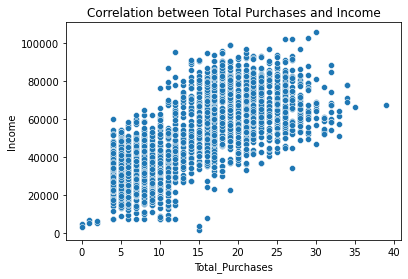

In [48]:
sns.scatterplot(x='Total_Purchases', y='Income', data=df)
plt.title('Correlation between Total Purchases and Income')

## Correlation between Total Amount of products bought and Income

Text(0.5, 1.0, 'Correlation between Total Amount of products bought and Income')

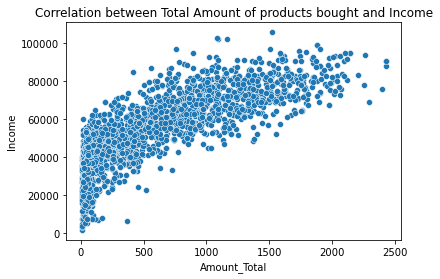

In [49]:
sns.scatterplot(x='Amount_Total', y='Income', data=df)
plt.title('Correlation between Total Amount of products bought and Income')

## Correlation of each columns

Text(0.5, 1.0, 'Correlation of each columns')

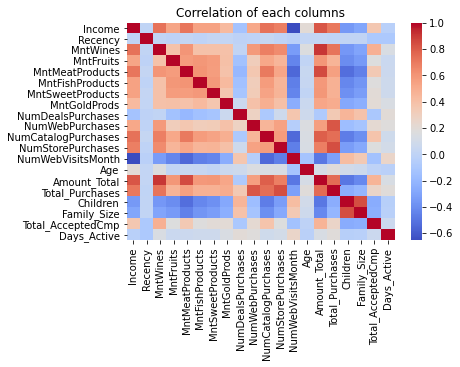

In [50]:
sns.heatmap(data=df_dist.corr(), cmap='coolwarm')
plt.title('Correlation of each columns')

# Data Modelling

## Preprocessing

### Manually encode Education and Marital Status

In [51]:
df['Education'] = df['Education'].apply(lambda x: 0 if x == 'Undergraduate' else 1)

In [52]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 1 if x == 'In Relationship' else 0)

### Scale the essential columns for modelling

In [53]:
model_features = df[['Education', 'Marital_Status', 'Income', 'Age', 'Amount_Total','Total_Purchases', 
                     'Children', 'Total_AcceptedCmp', 'Days_Active']]

In [54]:
scaler = StandardScaler()

In [55]:
scaled_features = scaler.fit_transform(model_features)

In [56]:
# Checking if the scaler works by making another dataframe
df_feat = pd.DataFrame(scaled_features,columns=model_features.columns)
df_feat.head()

,Education,Marital_Status,Income,Age,Amount_Total,Total_Purchases,Children,Total_AcceptedCmp,Days_Active
0,0.157786,-1.34682,0.315669,1.015735,1.548620,1.338821,-1.266464,0.616698,1.929847
1,0.157786,-1.34682,-0.259374,1.272139,-0.956407,-1.165509,1.393290,-0.503335,-1.611655
2,0.157786,0.74249,0.972672,0.331991,0.172619,0.811593,-1.266464,-0.503335,-0.072431
3,0.157786,0.74249,-1.219794,-1.291901,-0.924653,-0.901895,0.063413,-0.503335,-1.817457
4,0.157786,0.74249,0.323226,-1.035497,-0.337206,0.547980,0.063413,-0.503335,-1.011401


In [57]:
X = scaled_features

## Machine Learning Algorithm

### Utilize Elbow Method to pick the best K value

In [58]:
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 101)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)

### Inertia plot

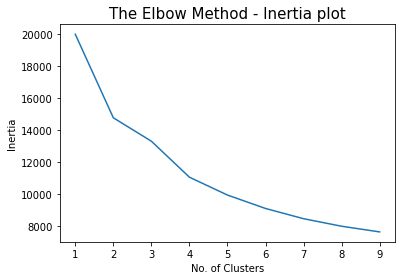

In [59]:
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 15)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

### Preparing KMeans 

In [60]:
kmeans = KMeans(n_clusters = 4, random_state = 101)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=101)

In [61]:
# Checking the centers
kmeans.cluster_centers_

array([[ 0.1577855 , -0.14294264,  1.29880838, -0.06770685,  1.6195125 ,
         0.80277345, -0.97972483,  2.04068132,  0.11084913],
       [ 0.1577855 ,  0.02292671, -0.75727638, -0.17887078, -0.80926828,
        -0.82686309,  0.44824454, -0.30568186, -0.13664633],
       [ 0.1577855 ,  0.01888719,  0.62807393,  0.29117659,  0.54985829,
         0.84072784, -0.22739942, -0.24649501,  0.1115326 ],
       [-6.33771778, -0.03132868, -1.52890179, -0.73319347, -0.88630013,
        -1.03126139, -0.30599735, -0.33740394,  0.36759699]])

### Assigning the clusters to each row

In [62]:
model_features['Cluster'] = kmeans.labels_ + 1

<ipython-input-62-6aa65b437f9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_features['Cluster'] = kmeans.labels_ + 1


In [63]:
model_features.head()

,Education,Marital_Status,Income,Age,Amount_Total,Total_Purchases,Children,Total_AcceptedCmp,Days_Active,Cluster
0,1,0,58138.0,57.0,1445,25.0,0,1,914,3
1,1,0,46344.0,60.0,25,6.0,2,0,88,2
2,1,1,71613.0,49.0,665,21.0,0,0,447,3
3,1,1,26646.0,30.0,43,8.0,1,0,40,2
4,1,1,58293.0,33.0,376,19.0,1,0,228,3


### Checking the distribution of every cluster

Text(0.5, 1.0, 'Clusters')

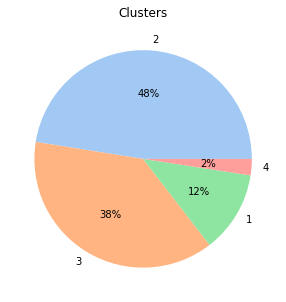

In [66]:
# Checking Only cluster column
colors = sns.color_palette('pastel')[0:5]
Cluster = model_features['Cluster'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(Cluster, labels = Cluster.index, colors = colors, autopct='%.0f%%')
plt.title('Clusters')

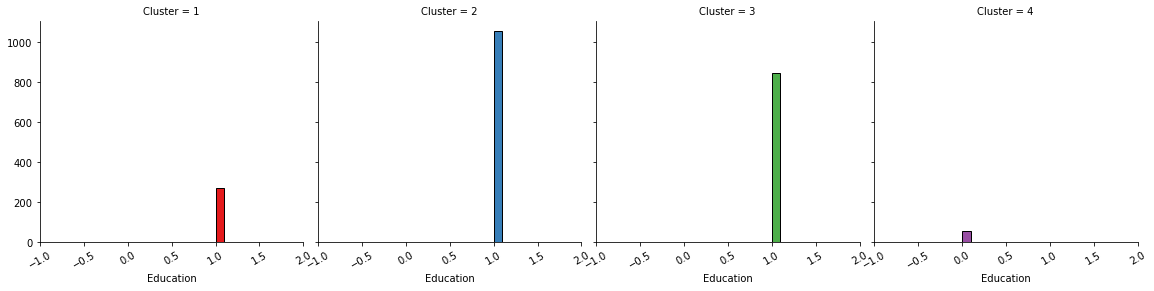

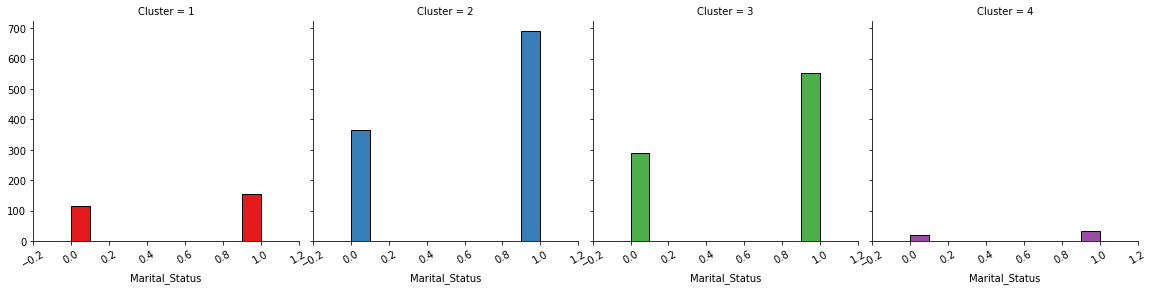

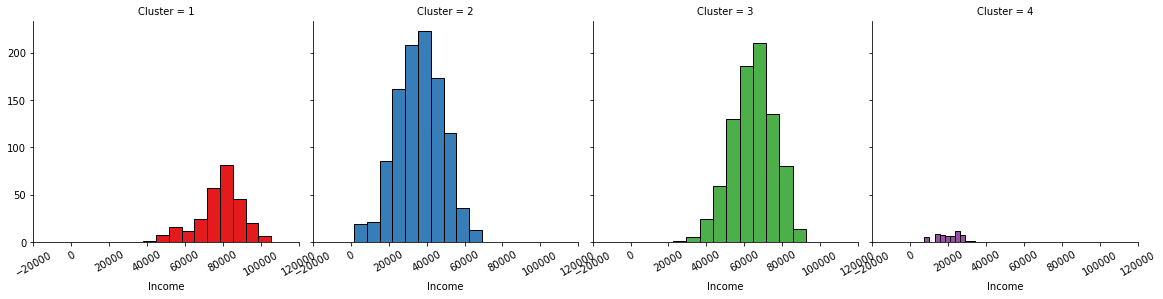

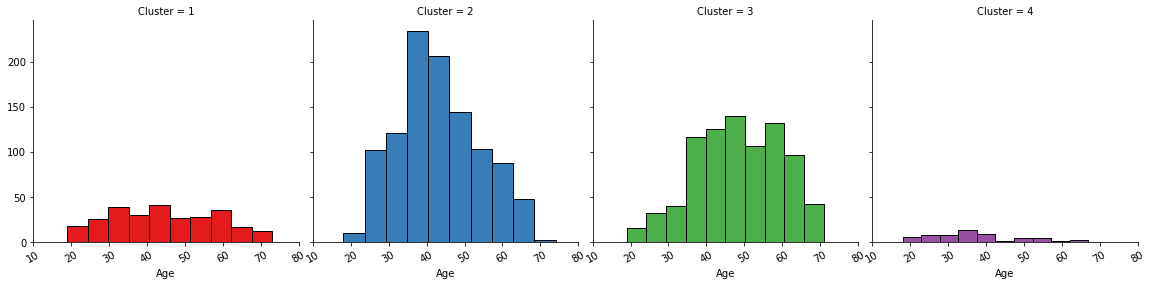

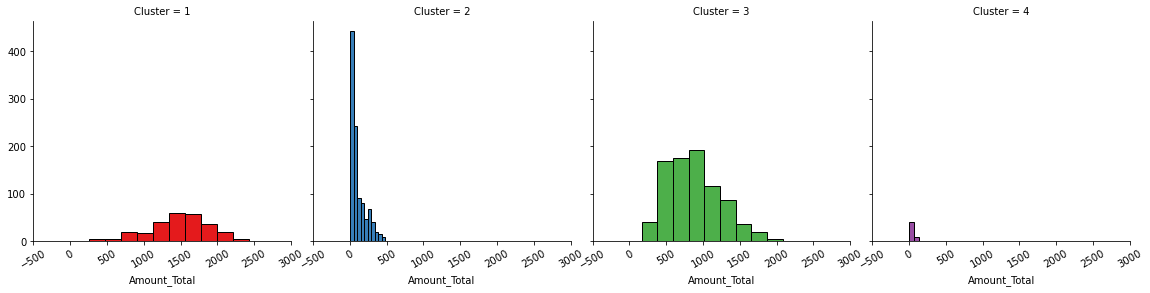

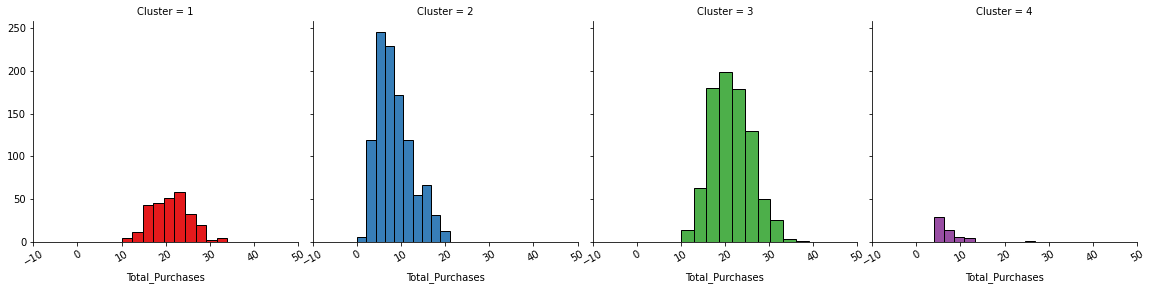

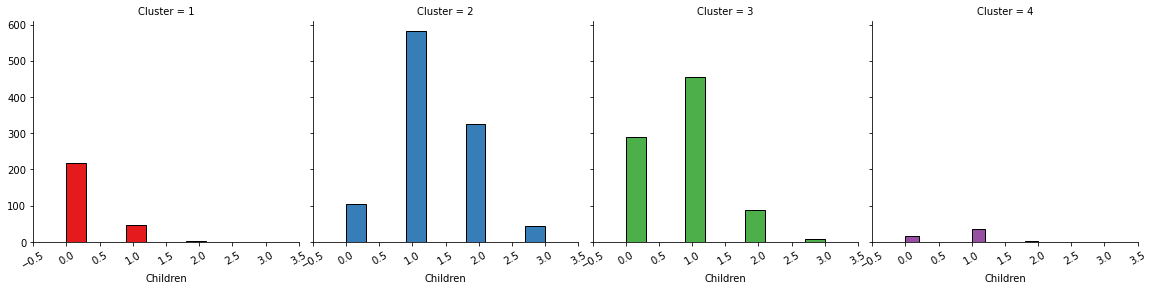

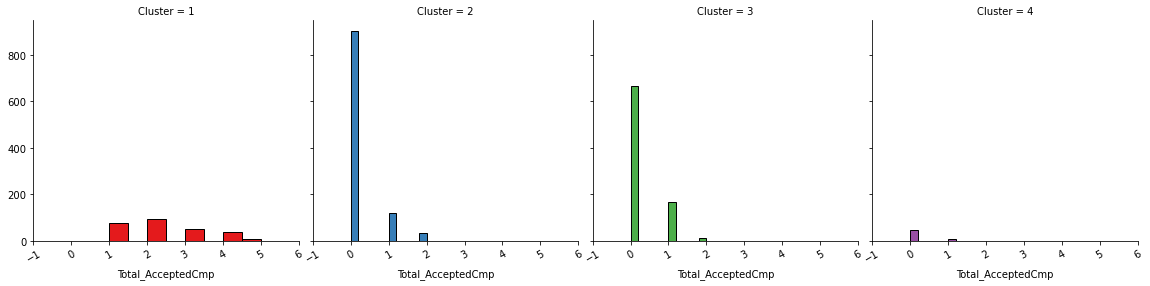

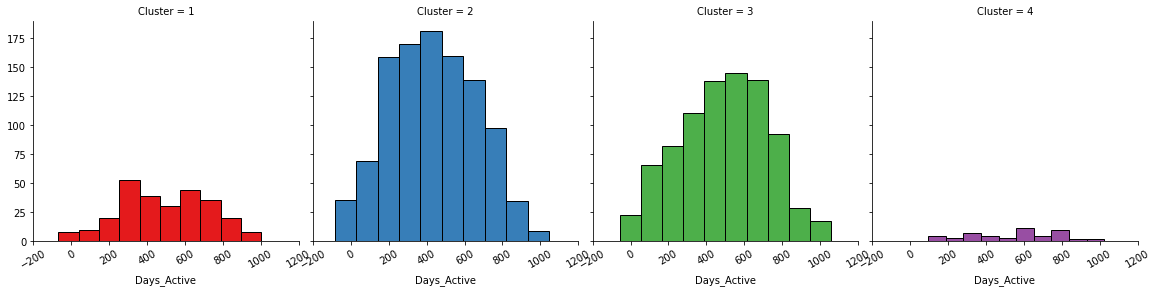

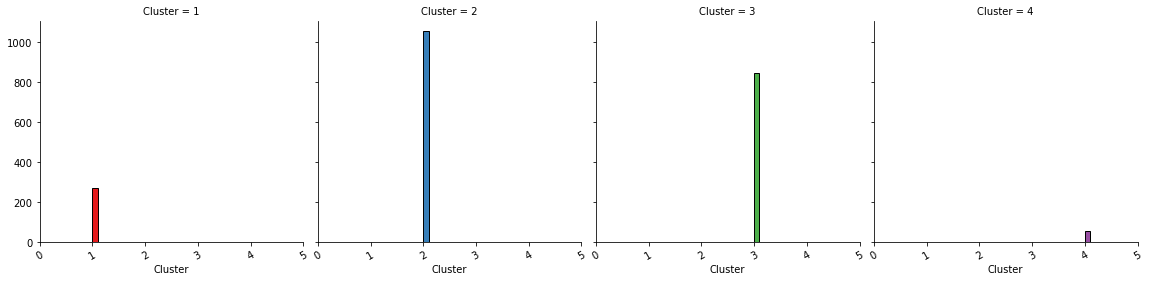

In [67]:
# Checking Every column
for i in model_features:
    diag = sns.FacetGrid(model_features, col = 'Cluster', hue = 'Cluster', palette = "Set1", height=4)
    diag.map(plt.hist, i, bins=10, ec="k") 
    diag.set_xticklabels(rotation=30, color = 'black')

# Conclusion

## From the results of clustering, there are four types of customers:

### 1. 48% of customers (Majority)
- All of them are Postgraduates
- Higher number of people who are in relationship than single people
- Have an approximately 20k-50k of income
- Around 25 to 60 years old with the maximum around 35 to 45 years old
- Bought approximately 50-400 products
- Made a purchase approximately 5-20 times
- Higher number of children than no child
- Most of them reject the marketing campaign
- Highest number of customers who have loyalty with the company for a long period of time

### 2. 38% of customers
- Slightly lower number of Postgraduates than 48% of people
- It's the same circumstances as 48% of people but slightly lower number of people
- Have an approximately 40k-80k of income
- Around 30 to 70 years old with the maximum around 45 to 60 years old
- Bought approximately 500-1700 products
- Made a purchase approximately 15-30 times
- Slightly higher number of children than no child
- Most of them reject the marketing campaign
- Slightly lower number of loyal customers compared to 48% of customers

### 3. 12% of customers 
- Significantly lower Postgraduates than the 38% of people 
- The number of people who are in relationship are slightly higher than single people
- Have an approximately 70k-90k of income
- Around 20 to 70 years old with the maximum around 30 to 60 years old
- Bought approximately 800-2000 products
- Made a purchase approximately 15-25 times
- Higher number of no child than have children
- None of them reject the marketing campaign
- Significantly lower number of loyal customers compared to 38% of customers

### 4. 2% of customers (Minority)
- All of them are Undergraduates
- It's the same circumstances as 12% of customers but with lower number
- Have an approximately 15k-30k of income
- Around 20 to 65 years old with the maximum around 35 to 40 years old
- Bought approximately 20-100 products
- Made a purchase approximately 5-10 times
- Slightly higher number of children than no child
- Most of them reject the marketing campaign
- Least number of loyal customers